# GRIP Task 1 :  Prediction using Supervised ML

## Task : Predict the percentage of a student based on the no. of study hours.

In [1]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#Reading the data

data = pd.read_csv('student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Data Exploring

In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
data.shape

(25, 2)

In [5]:
#Check for Missing Values

data.isna().sum()

Hours     0
Scores    0
dtype: int64

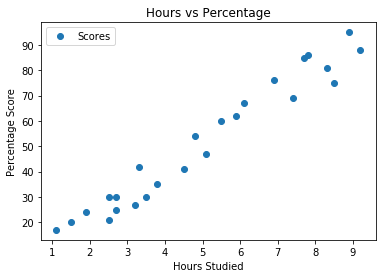

In [6]:
#Plotting the data

data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

There is a positive linear relation between the number of hours studied and percentage of score.

### Preparing data for fitting the model 

In [7]:
X = data.iloc[:, 0:1]
Y = data.iloc[:, -1:]
Y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


In [8]:
#Splitting Data

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=90)

In [9]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((20, 1), (5, 1), (20, 1), (5, 1))

In [10]:
Y_test.head()

,Scores
1,47
22,35
21,54
20,30
15,95


### Training the model

In [11]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [12]:
#Testing the data

pred = model.predict(X_test)
pred

array([[52.26001221],
       [39.77985348],
       [49.37997558],
       [29.21971917],
       [88.74047619]])

In [13]:
#Finding Coefficent and Intercept

print(model.intercept_)
print(model.coef_)

[3.2993895]
[[9.6001221]]


### Comparing Actual and Predicted Scores 

In [14]:
actual = Y_test['Scores']

In [15]:
comp_data = pd.DataFrame({'Actual': actual, 'Predicted': pred.reshape(-1)})
comp_data

,Actual,Predicted
1,47,52.260012
22,35,39.779853
21,54,49.379976
20,30,29.219719
15,95,88.740476


### Evaluating Model 

In [16]:
#Calculating mean absolute error

mae = mean_absolute_error(Y_test,pred)
mae

4.339938949938948

The value of mean absolute error is 4.33, which is less than 10% of the mean value of the percentages of all the students i.e. 51.48. 
This means that the algorithm works well for the required data.

### Predicted score if a student studies for 9.25 hrs/ day

In [17]:
hours = 9.25
hrs = np.array([hours])
pred_score = model.predict(hrs.reshape(-1,1))
print("Study Hours per day: ", hours)
print("Predicted Score: ",pred_score[0][0])

Study Hours per day:  9.25
Predicted Score:  92.10051892551893
